In [1]:
import matplotlib.patches as patches
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation
import math

In [2]:
def alg_Brezenhem_for_line(x1, y1, x2, y2):
    if(x1 == x2 and y1 == y2): 
        print("Концы отрезка совпадают, введите другие значения.")
    else:
        #инициализация
        x = x1
        y = y1
        dx = abs(x2 - x1)
        dy = abs(y2 - y1)
        s1 = np.sign(x2 - x1)
        s2 = np.sign(y2 - y1) 
        #угловой коэффициент наклона отрезка
        if(dy > dx):
            temp = dx
            dx = dy
            dy = temp
            ChangeFlag = True
        else:
            ChangeFlag = False
        #инициализация
        t = 2*dy - dx
        i = 0
        x_points = []
        y_points = []

        #основной цикл
        while (i < dx):
            x_points.append(x)
            y_points.append(y)
            while t >= 0:
                if(ChangeFlag):
                    x += s1
                else:
                    y += s2
                t = t - 2*dx
            if(ChangeFlag):
                y += s2
            else:
                x += s1
            t = t + 2*dy
            i += 1
        return x_points,y_points

MovieWriter PillowWriter unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


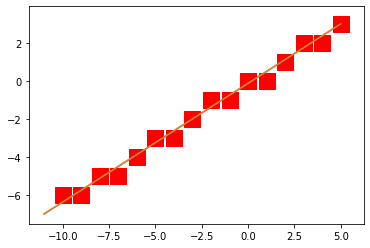

In [3]:
x1 = 5
y1 = 3
x2 = -11
y2 = -7

x_points = alg_Brezenhem_for_line(x1, y1, x2, y2)[0]
y_points = alg_Brezenhem_for_line(x1, y1, x2, y2)[1]

fig, ax = plt.subplots()

def init():
    plt.plot((x1,x2),(y1,y2))

def animate(i):
    line = ax.scatter([x_points[i]],[y_points[i]], c = 'r', s = 250, marker = 's')
    return line

line_animation = animation.FuncAnimation(fig, animate, frames=len(x_points), init_func=init, interval=10, repeat=False)
line_animation.save('рисование отрезка.gif', writer='PillowWriter', fps=5)


In [4]:
def alg_Brezenhem_for_circle(R):
    #инициализация начинаем в точке(0;R)
    d = 3 - 2*R
    u = 6
    v = 10 - 4*R
    x = 0
    y = R
    x_points = []
    y_points = []
    
    #цикл алгоритма Брезенхема
    while (v < 10):
        #отображение точек с помощью преобразований симметрии
        x_points.append(x)
        y_points.append(y)
        x_points.append(x)
        y_points.append(-y)
        x_points.append(y)
        y_points.append(-x)
        x_points.append(y)
        y_points.append(x)
        x_points.append(-x)
        y_points.append(y)
        x_points.append(-y)
        y_points.append(x)
        x_points.append(-y)
        y_points.append(-x)
        x_points.append(-x)
        y_points.append(-y)
        if(d <= 0):
            d += u
            u += 4
            v += 4
            x += 1
        else:
            d += v
            u += 4
            v += 8
            x += 1
            y -= 1
    return x_points,y_points


MovieWriter PillowWriter unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


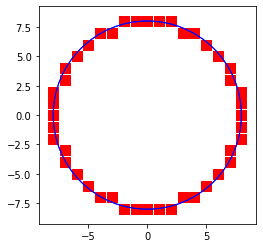

In [5]:
R = 8
x_points = alg_Brezenhem_for_circle(R)[0]
y_points = alg_Brezenhem_for_circle(R)[1]

fig, ax = plt.subplots()

def init():
    ax = plt.gca()
    ax.add_patch(plt.Circle((0,0), radius= R, ec = 'b', fill = 0))
    plt.axis('scaled')
    
def animate(i):
    line = ax.scatter([x_points[i]],[y_points[i]], c = 'r', s = 100, marker = 's')
    return line

line_animation = animation.FuncAnimation(fig, animate, frames=len(x_points), init_func=init, interval=100, repeat=False)
line_animation.save('рисование окружности.gif', writer='PillowWriter', fps=5)


In [6]:
def alg_Brezenhem_for_ellipse(x0, y0, a, b):
    #инициализация переменных
    x = 0
    y = b
    d = b * b + a * a * (1/4 - b)
    x_points = []
    y_points = []
    #переменная для перехода к построению второго участка
    x_m = ((a * a)/(math.sqrt(a * a + b * b))) - 1/2
    
    #пошаговый расчёт первого участка и инициализация пикселей
    x_points.append(x0+x)
    y_points.append(y0+y)
    x_points.append(x0+x)
    y_points.append(y0-y)
    x_points.append(x0-x)
    y_points.append(y0+y)
    x_points.append(x0-x)
    y_points.append(y0-y)
    while (x < x_m):
        if (d < 0):
            d += b * b * (2 * x + 3)
            x += 1
        else:
            d += b * b * (2 * x + 3) + a * a * (2 - 2 * y)
            y -= 1
            x += 1
        x_points.append(x0+x)
        y_points.append(y0+y)
        x_points.append(x0+x)
        y_points.append(y0-y)
        x_points.append(x0-x)
        y_points.append(y0+y)
        x_points.append(x0-x)
        y_points.append(y0-y) 
    
    #для второго участка
    d = b * b * (x + 1/2) * (x + 1/2) + a * a * (y - 1) * (y - 1) - a * a * b * b
    while (y > 0):
        if (d < 0):
            d += b * b * (2 * x + 2) + a * a * (3 - 2 * y)
            x += 1
            y -= 1
        else:
            d += a * a * (3 - 2 * y)
            y -=1
        x_points.append(x0+x)
        y_points.append(y0+y)
        x_points.append(x0+x)
        y_points.append(y0-y)
        x_points.append(x0-x)
        y_points.append(y0+y)
        x_points.append(x0-x)
        y_points.append(y0-y)
    return x_points,y_points

MovieWriter PillowWriter unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


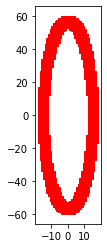

In [7]:
x0 = 0
y0 = 0
a = 15
b = 57
x_points = alg_Brezenhem_for_ellipse(x0, y0, a, b)[0]
y_points = alg_Brezenhem_for_ellipse(x0, y0, a, b)[1]

fig, ax = plt.subplots()
    
def animate(i):
    line = ax.scatter([x_points[i]],[y_points[i]], c = 'r', s = 100, marker = 's')
    plt.axis('scaled')
    return line

line_animation = animation.FuncAnimation(fig, animate, frames=len(x_points), interval=150, repeat=True)
line_animation.save('рисование эллипса.gif', writer='PillowWriter', fps=10)